<a href="https://colab.research.google.com/github/anoopadavis/Machine-Learning-Mini-Project/blob/master/KNN_on_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets_228_482_diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It is seen that all 768 values are non - null.But a look at the dataframe makes it clear that there are missing values.But they are given as zeroes.So we have to replace the zeroes with NaN so that we can then insert missing values.

In [4]:
import numpy as np
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## creating a new data frame where all missing values are Nan
print(df_copy.isnull().sum()) ##total missing values in each column of the dataset 

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


visualisation


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


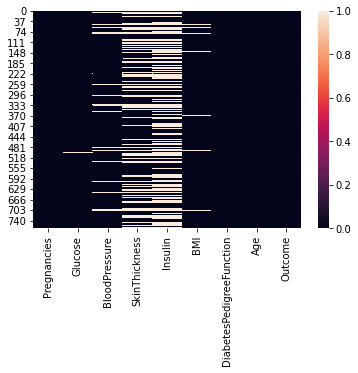

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.heatmap(df_copy.isnull())

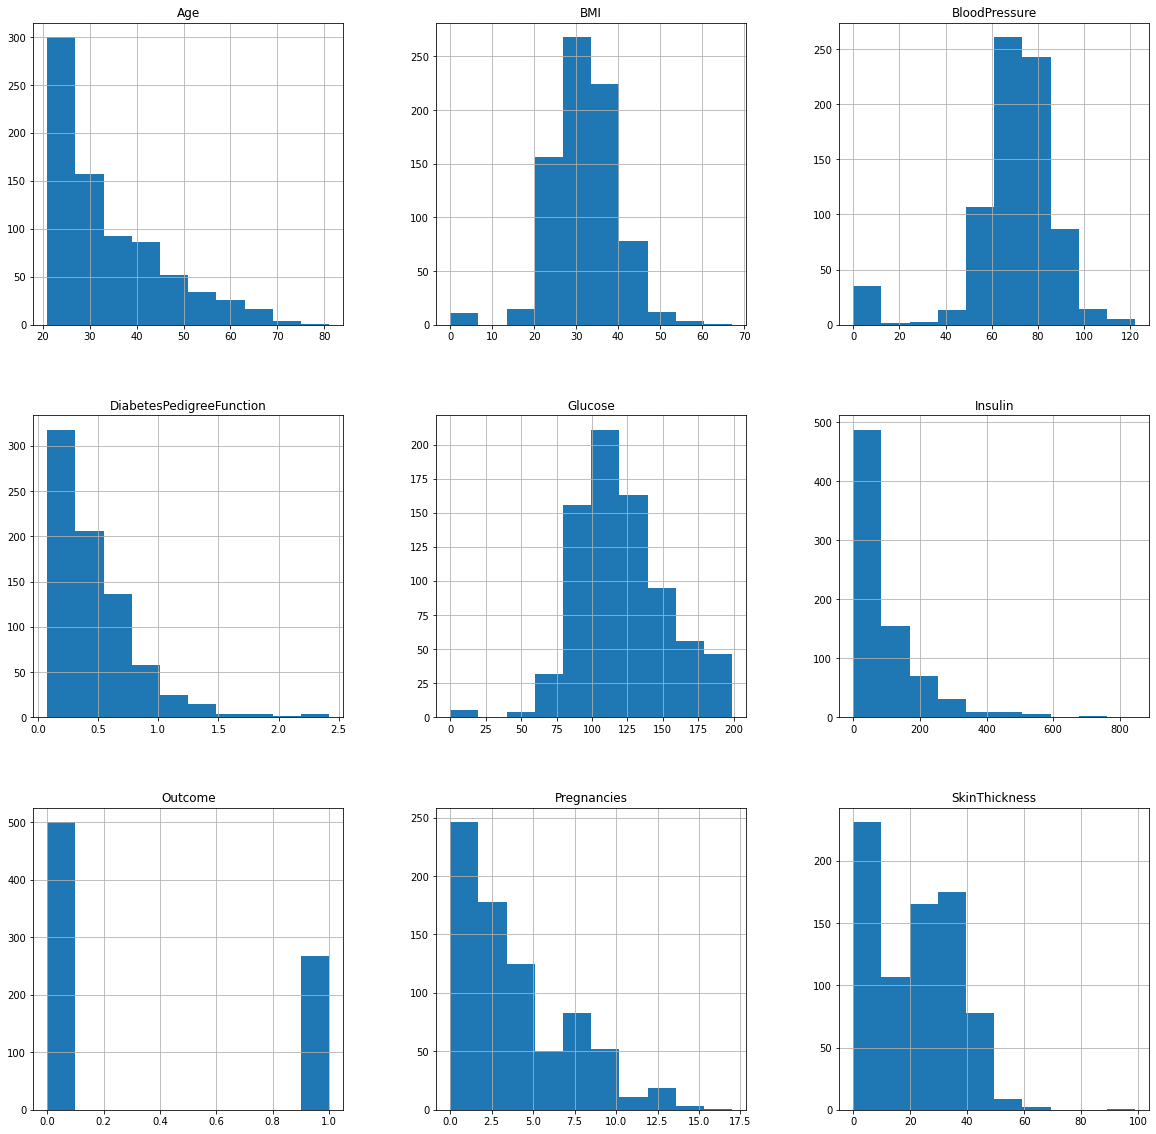

In [6]:
p = df.hist(figsize = (20,20))


Now we will replace the NaN values with mean and median values.

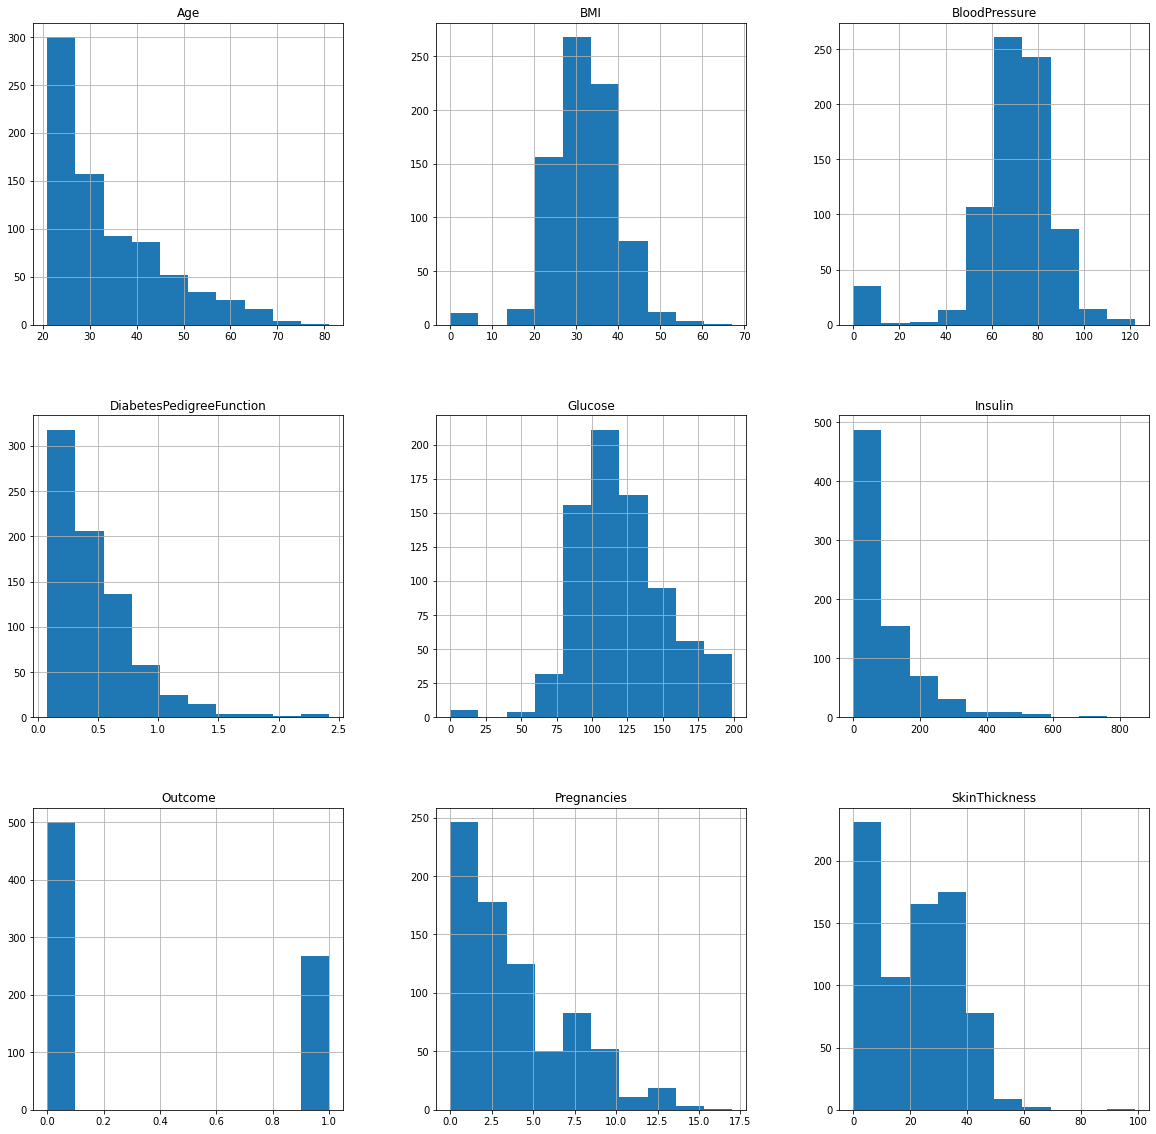

In [7]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

p = df.hist(figsize = (20,20))




Now let us see if it balanced or unbalanced data.


0    500
1    268
Name: Outcome, dtype: int64


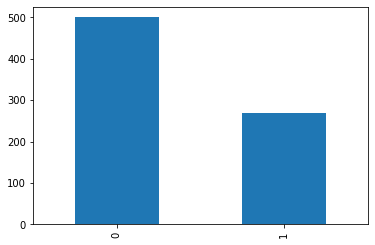

In [8]:
print(df_copy.Outcome.value_counts())
p=df_copy.Outcome.value_counts().plot(kind="bar")

The dataset is unbalanced.
So note that we have to use fine tuning skills / cross validation later.Now to scale the data to a range.

In [9]:
x = df_copy.iloc[:,0:8].values
y = df_copy.iloc[:,8].values


In [10]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1/3,random_state = 42,stratify = y,shuffle = True)
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3,shuffle = True)
for train_index, test_index in skf.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
x_train.shape


(512, 8)

In [13]:
x_test.shape

(256, 8)

In [14]:
x_train

array([[0.53333333, 0.9025974 , 0.40816327, ..., 0.10429448, 0.25139186,
        0.2244898 ],
       [0.06666667, 0.29220779, 0.42857143, ..., 0.20245399, 0.03511777,
        0.        ],
       [0.        , 0.6038961 , 0.16326531, ..., 0.50920245, 0.94346895,
        0.24489796],
       ...,
       [0.13333333, 0.50649351, 0.46938776, ..., 0.3803681 , 0.10920771,
        0.12244898],
       [0.33333333, 0.5       , 0.48979592, ..., 0.16359918, 0.06852248,
        0.18367347],
       [0.06666667, 0.31818182, 0.46938776, ..., 0.24948875, 0.09850107,
        0.04081633]])

Finding k.Total values we have = 768. Its square root = 27.7. That is k=27 but we know that this is an unbalanced data set. So we need to reduce k. We need to find a suitable k by trial and error. I have fixed it to k= 11

In [15]:
model = KNeighborsClassifier(n_neighbors=11)

In [16]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

75.390625

To improve this we change the method of train_test split and use another functionality offered by sklearn namely stratifiedkfold.

In [18]:
y_p=model.predict([x_test[0]])
print(y_p)

[1]


In [19]:
y_test[0]

1

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       167
           1       0.66      0.60      0.63        89

    accuracy                           0.75       256
   macro avg       0.73      0.72      0.72       256
weighted avg       0.75      0.75      0.75       256



In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[140,  27],
       [ 36,  53]])